In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from My_functions import reverse_colourmap 

In [2]:
prefix = "_test_nano"
save_figs = 0

In [3]:
id_file = "ts"
files_home = "/data/rd_exchange/mbelharet/nemo_4.0_fabm_pisces"
filename_fabm = "C1D_PAPA_fabm" + prefix + "_1" + id_file + "_20100615_20110614_diad_T.nc"  
filename = "C1D_PAPA" + prefix + "_1"+ id_file +"_20100615_20110614_diad_T.nc"

In [4]:
data_fabm = xr.open_dataset(files_home + "/" + filename_fabm).isel(x=1, y=1)  
data = xr.open_dataset(files_home + "/" + filename).isel(x=1, y=1)

In [5]:

flags = ["_fabm", ""]
fact = [1 , 1e6]
ndt_min = 0
ndt_max = 24*2 #24*365

#print("nano" + flag + "= data" + flag +"[\"nano_phyto\"].to_numpy()")
'''
ncVars = ["heup","heup_01","etot_ndcy","PAR","qsr_mean","qsr","pqsr100", "pe1","pe2","pe3",
          "zsiremin","zosil","zfacsib","zfacsi","znusil",
        "zomegaca", "xfracal", "ztortp", "zresp",
        "MuD","TPP_dia",
         "zlim1","zlim2","zlim3","zlim4","PFeD",
         "grazp", "quotan"] #,"Tchl"]
         '''
ncVars = ["PAR", "xfracal", "zresp","zprofe", "ztortp", "xlim", "zpr", "zpronew", ]


In [6]:
##### Pisces variables #############
id = -1
for flag in flags:
    id+=1
    for ncVar in ncVars:
        exec(ncVar + flag + "= data" + flag +"[\"" + ncVar + "\"].to_numpy()")

In [7]:
def plot_variables(variables):
    fig = plt.figure(figsize=(10,6))
    nb = int(np.ceil(len(variables)/2))
    cptr = 0
    
    for var in variables:
        cptr+=1
        ax = fig.add_subplot(nb,2,cptr)
        for flag in flags:
            ldict = {}
            exec("v =" +  var + flag , globals(),ldict)
            v = ldict['v'] 
            #print(v.shape)
            if(v.ndim == 1):
                v_mean = v
            elif(v.ndim == 2):
                v_mean = v[:,0]
            else:
                print("coucou")
               
            plt.plot(v_mean[ndt_min:ndt_max])
            
        
        plt.xticks(fontsize=7)
        plt.yticks(fontsize=7)
        plt.title(var , fontsize=12) 
        plt.ylabel("$µmol\ L^{-1}$",fontsize=8)
        plt.xlabel("Time steps",fontsize=8)
        plt.legend(["with FABM", "standard"])

    # Space between subplots
    fig.tight_layout(pad=1.5)

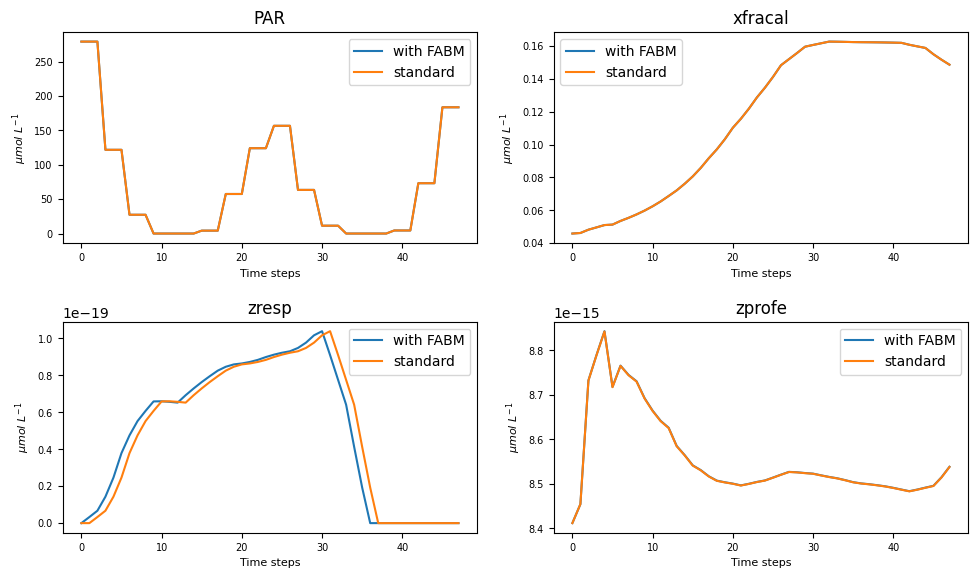

In [8]:
variables1 = ncVars[0:4]
plot_variables(variables1)
if(save_figs):
    plt.savefig("comparison_BGC_variables_1" + prefix + ".png")

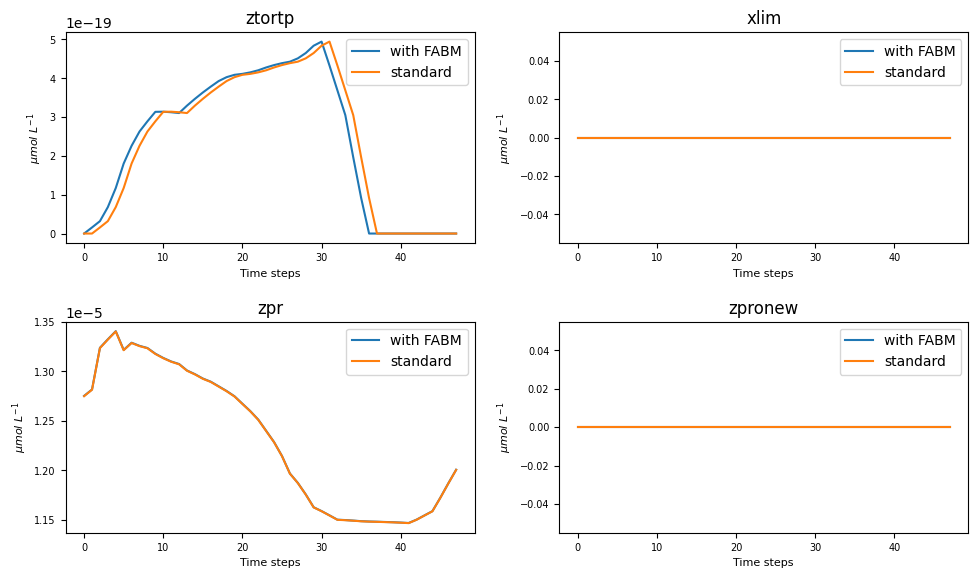

In [9]:
variables2 = ncVars[4:8]
plot_variables(variables2)
if(save_figs):
    plt.savefig("comparison_BGC_variables_2" + prefix + ".png")

In [10]:
# Negative values of PAR

id1 = np.argwhere(PAR_fabm<0)
id2 = np.argwhere(PAR<0)
#print(id1[0])

par_fabm_negativ = np.empty(id1.shape[0])
for i in range(0,id1.shape[0]):
    tt = id1[i]
    par_fabm_negativ[i] = PAR_fabm[tt[0],tt[1]]

id_min = np.argwhere(par_fabm_negativ == min(par_fabm_negativ))
print(id1[id_min])
print(min(par_fabm_negativ))

print(max(par_fabm_negativ)) 

#print(id2)
#print(id1.shape)
#print(id2.shape)


[[[8124    0]]

 [[8125    0]]

 [[8126    0]]]
-0.0171348974108696
-1.401298464324817e-45


In [11]:
variables3 = ncVars[7:10]
toto_fabm = local_random_fabm[:,0] / integral_random_weights_fabm 
variables3.append('toto')
plot_variables(variables3)

if(save_figs):
    plt.savefig("comparison_BGC_variables_3" + prefix + ".png")

NameError: name 'local_random_fabm' is not defined

In [ ]:
variables4 = ncVars[10:15]
plot_variables(variables4)
if(save_figs):
    plt.savefig("comparison_BGC_variables_4" + prefix + ".png")

In [ ]:

variables5 = ncVars[15:19]
goc_from_nano = 0.5 * xfracal * (ztortp + zresp);
goc_from_nano_fabm = 0.5 * xfracal_fabm * (ztortp_fabm + zresp_fabm);
variables5.append("goc_from_nano")
plot_variables(variables5)
if(save_figs):
    plt.savefig("comparison_BGC_variables_5" + prefix + ".png")

In [ ]:
variables6 = ncVars[19:21]
for flag in flags:
    exec("produit" + flag + " = " +  variables6[0] + flag + " * " + variables6[1] + flag)

variables6.append("produit")

plot_variables(variables6)
if(save_figs):
    plt.savefig("comparison_BGC_variables_6" + prefix + ".png")

In [ ]:
variables7 = ncVars[21:26]
plot_variables(variables7)
if(save_figs):
    plt.savefig("comparison_BGC_variables_7" + prefix + ".png")

In [ ]:
variables8 = ncVars[26:28]
plot_variables(variables8)
if(save_figs):
    plt.savefig("comparison_BGC_variables_8" + prefix + ".png")

In [ ]:

variables9 = ncVars[28:30]
plot_variables(variables9)
if(save_figs):
    plt.savefig("comparison_BGC_variables_9" + prefix + ".png")

In [ ]:
################### wsbio4 ################################
data = xr.open_dataset(files_home + "/" + filename).isel(x=1, y=1)
wsbio = data["wsbio4"].to_numpy()

depth = data['deptht'].to_numpy()


In [ ]:
depth_min = 0
depth_max = 1000
ndt_min = 0
ndt_max = 1000 #24 * 365

dep_min_id = np.asarray(np.where(depth>=depth_min))[0,0]
dep_max_id = np.asarray(np.where(depth<=depth_max))[0,-1]

In [ ]:
v = wsbio[10,dep_min_id:dep_max_id]
dep = depth[dep_min_id:dep_max_id]

fig = plt.figure(figsize=(10,6))
plt.plot(v,-dep)        
    
    

In [ ]:
################### Turbocline depth ################################
filename = "C1D_PAPA_1ts_20100615_20110614_grid_T.nc"

In [ ]:
data = xr.open_dataset(files_home + "/" + filename).isel(x=1, y=1)

In [ ]:
hmld = data["hmld"].to_numpy()
hmld_fabm = data_fabm["hmld"].to_numpy()

In [ ]:
variables = ["hmld"]

In [ ]:
fig = plt.figure(figsize=(10,6))

nb = int(np.ceil(len(variables)/2))
cptr = 0
for var in variables:
    cptr+=1
    ax = fig.add_subplot(nb,2,cptr)
    for flag in flags:
        exec("v =" +  var + flag ) 
        v_mean = v  #np.mean(v,axis=1)
             
        plt.plot(v_mean[0:ndt_max])
        
    
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.title(var , fontsize=12) 
    plt.ylabel("$µmol\ L^{-1}$",fontsize=8)
    plt.xlabel("Time steps (h)",fontsize=8)
    plt.legend(["with FABM", "standard"])

# Space between subplots
fig.tight_layout(pad=1.5)

if(save_figs):
    plt.savefig("comparison_BGC_variables_3" + prefix + ".png")